# Image compression through Singular Value Decomposition

Load a picture as a 3-dimensional `np.array`

In [2]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [8, 8]

# write here the import path of the image
image_path = 'TarantulaNebula.jpg'

A = imread(image_path)

In [3]:
A.shape

(567, 630, 3)

Visualize the picture

(-0.5, 629.5, 566.5, -0.5)

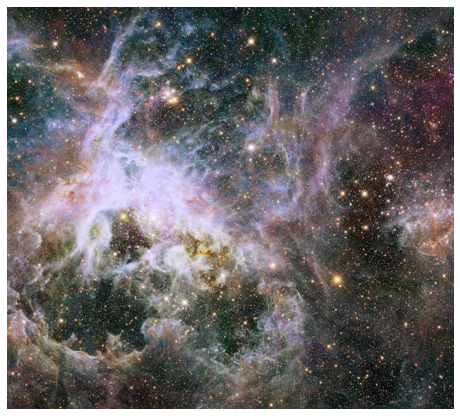

In [4]:
img = plt.imshow(A)
plt.axis('off')

Convert the picture to gray-scale and visualize it.

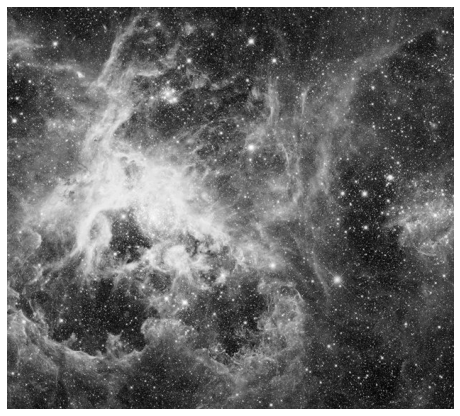

In [5]:
X = np.mean(A, axis = 2)
img = plt.imshow(X)
plt.axis('off')
img.set_cmap('gray')

What is the picture size?

In [6]:
X.shape

(567, 630)

Perform the SVD decomposition

In [7]:
U, s, VT = np.linalg.svd(X, full_matrices = False)
U.shape, s.shape, VT.shape

((567, 567), (567,), (567, 630))

Plot the trend of
- the singular values $\sigma_k$
- the cumulate fraction of singular values: $\frac{\sum_{i=1}^{k} \sigma_i}{\sum_{i=1}^{q} \sigma_i}$
- the fraction of the "explained variance": $\frac{\sum_{i=1}^{k} \sigma_i^2}{\sum_{i=1}^{q} \sigma_i^2}$

Text(0.5, 1.0, 'explained variance')

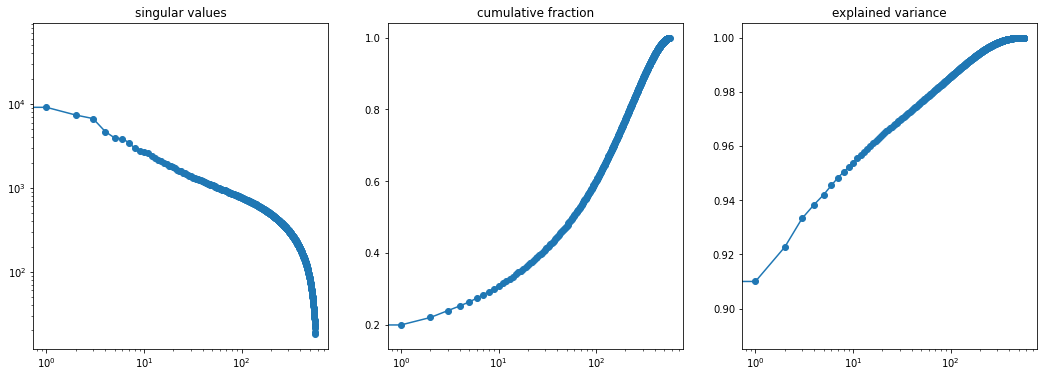

In [8]:
fig, axs = plt.subplots(1,3, figsize = (18,6))
axs[0].loglog(s, 'o-')
axs[0].set_title('singular values')

axs[1].semilogx(np.cumsum(s) / np.sum(s), 'o-')
axs[1].set_title('cumulative fraction')

axs[2].semilogx(np.cumsum(s**2) / np.sum(s**2), 'o-')
axs[2].set_title('explained variance')

Visualize the best rank-$k$ matrices, for $k$ = 1, 5, 10, 50, 100, 500

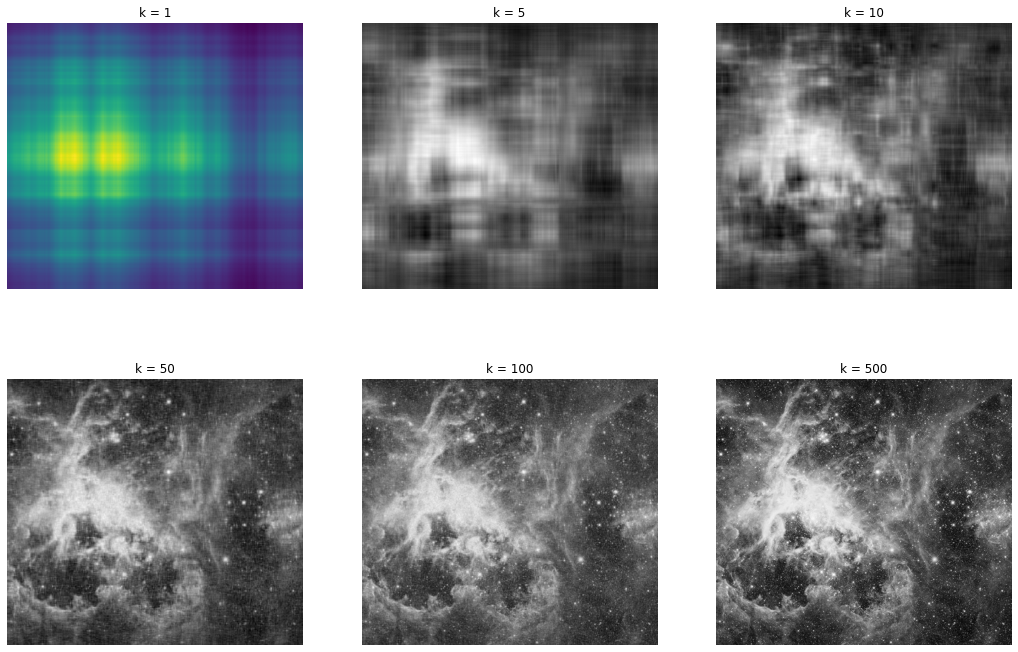

In [9]:
fig, axs = plt.subplots(2,3,figsize = (18,12))
axs = axs.flatten()
idxs = [1,5,10,50,100,500]
for i in range(len(idxs)):
  k = idxs[i]
  Xk = U[:,:k] @ np.diag(s[:k]) @ VT[:k,:]
  axs[i].imshow(Xk)
  axs[i].set_title('k = %d' % k)
  axs[i].axis('off')
  plt.set_cmap('gray')

Visualize the $k$-th rank-1 matix, for $k$ = 1,2,...,6

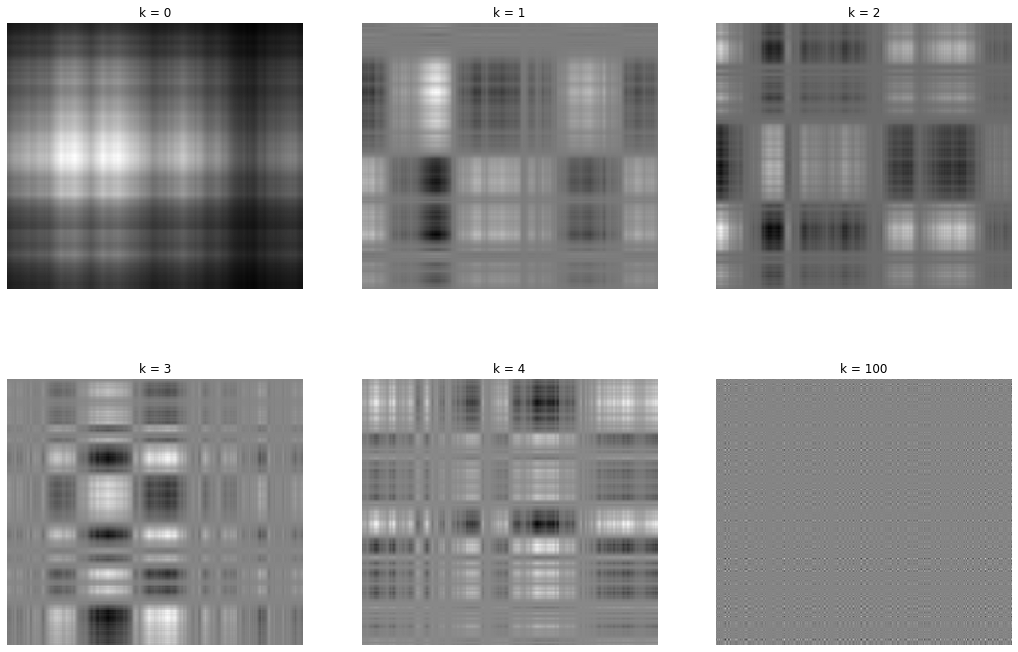

In [10]:
fig, axs = plt.subplots(2,3,figsize = (18,12))
axs = axs.flatten()
idxs = [0,1,2,3,4,100]
for i in range(len(idxs)):
  k = idxs[i]
  Xk = np.outer(s[k]*U[:,k], VT[k,:])
  axs[i].imshow(Xk)
  axs[i].set_title('k = %d' % k)
  axs[i].axis('off')
  plt.set_cmap('gray')

## Randomized SVD

Implement now a function that computes the randomized SVD of rank $k$ of a generic matrix $A$.

In [11]:
def randomized_SVD(A, k):
  m, n = A.shape
  P = np.random.randn(n, k)
  Z = A @ P
  Q, R = np.linalg.qr(Z)
  Y = Q.T @ A
  Uy, sy, VTy = np.linalg.svd(Y, full_matrices = False)
  U = Q @ Uy
  return U, sy, VTy

Set $k=100$ and compute the randomized SVD of the picture used above.

In [12]:
k = 100
U_rand, s_rand, VT_rand = randomized_SVD(X, k)

Plot the approximate singular values, their cumulate values and their cumulate squares, with a comparison of the ones obtained with the "exact" (i.e. non randomized) SVD.

Text(0.5, 1.0, 'explained variance')

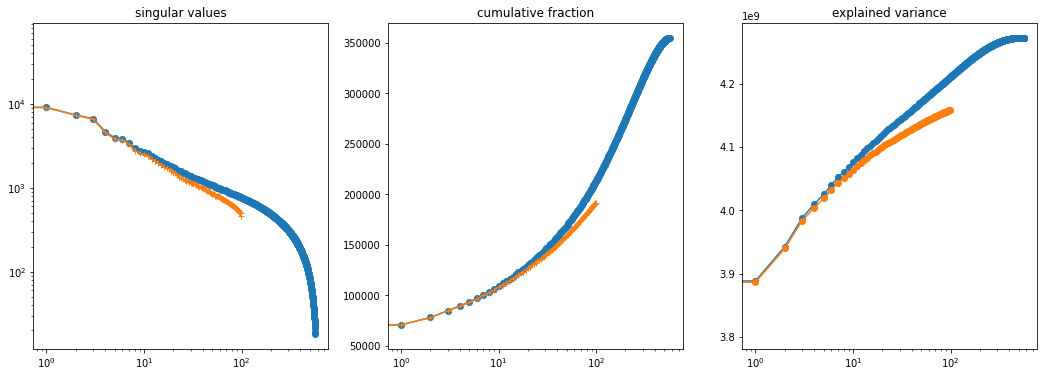

In [13]:
fig, axs = plt.subplots(1,3, figsize = (18,6))
axs[0].loglog(s, 'o-')
axs[0].loglog(s_rand, '+-')
axs[0].set_title('singular values')

axs[1].semilogx(np.cumsum(s), 'o-')
axs[1].semilogx(np.cumsum(s_rand), '+-')
axs[1].set_title('cumulative fraction')

axs[2].semilogx(np.cumsum(s**2) , 'o-')
axs[2].semilogx(np.cumsum(s_rand**2) , 'o-')
axs[2].set_title('explained variance')

Compare the original picture with the best rank-$k$ matrix obtained through SVD and the best rank-$k$ matrix obtained through randomized SVD.

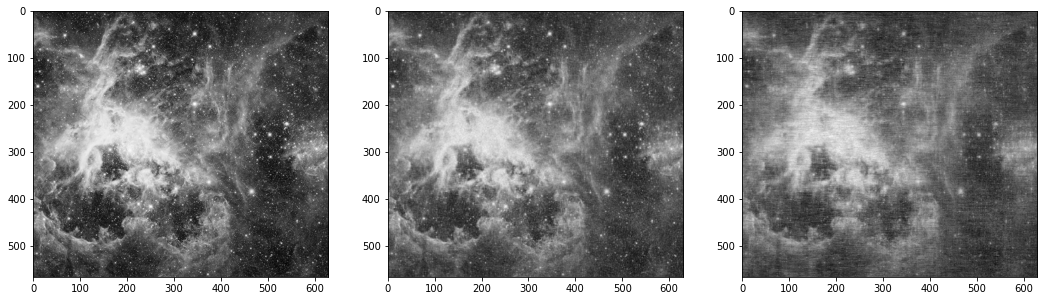

In [14]:
fig, axs = plt.subplots(1,3,figsize = (18, 6))


axs[0].imshow(X)
axs[1].imshow(U[:,:k] @ np.diag(s[:k]) @ VT[:k,:])
axs[2].imshow(U_rand @ np.diag(s_rand) @ VT_rand)